# Holistic testing

Up to this moment, we have only shown how the package performs with our own dataset. The moment of truth is when we test our software with other people's datasets. In this section we have compiled saturation mutagenesis datasets found in the literature and we reproduce the analysis. Not only does the package works with other datasets, but also it allows to customize a wide range of parameters such as color maps, scales, etc. Furthermore, on top of testing the resilience of ``mutagenesis_visualization``, we are providing extra examples on how to use this API.

In [1]:
# running locally, if you pip install then you just have to import the module
import sys
sys.path.append('../../')

import mutagenesis_visualization as mut
import numpy as np
import pandas as pd
import matplotlib as plt
import copy

In [2]:
# Dictionary with the datasets
data_dict = mut.demo_datasets()
# Beta lactamase data
df_bla = data_dict['df_bla']
# Sumo
df_sumo1 = data_dict['df_sumo1']
# MAPK1
df_mapk1 = data_dict['df_mapk1']
#UBE2I
df_ube2i = data_dict['df_ube2i']
#TAT
df_tat = data_dict['df_tat']
#REV
df_rev = data_dict['df_rev']
# asynuclein
df_asynuclein = data_dict['df_asynuclein']
# APH
df_aph = data_dict['df_aph']
# b11L5
df_b11L5F = data_dict['df_b11L5F']

Now we will import the modules. Note that this is being done on a local Jupyter notebook, you should change the path of output files to your own. 

## Beta Lactamase

### Load data

Note that in this Jupyter notebook we are retrieving the data from an Excel file called "DMS_others.xlsx". This file is included with the package, although to ease the workflow, we have saved into pickle files each of the dataframes that we are obtaining. This is appliable to each of the nine examples.

In [3]:
#https://www.uniprot.org/uniprot/P62593#sequences

path = '../Data/DMS_others.xlsx'
sheet_name = 'bla'
usecols = 'A,F'

# Read excel file
#df_bla_raw = pd.read_excel(path, sheet_name, usecols=usecols)
df_bla_raw = pd.read_pickle('../data/df_bla_raw.pkl')

# Save into pickle so it is easier to read next time you need it
#df_bla_raw.to_pickle('../data/df_bla_raw.pkl')

# Parse
df_bla, sequence_bla = mut.parse_pivot(
    df_bla_raw, col_data='DMS_amp_625_(b)'
)

### Create object

In [4]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_bla.index)
neworder_aminoacids = list('DEKHRGNQASTPCVYMILFW')

# First residue of the hras_enrichment dataset. Because 1-Met was not mutated, the dataset starts at residue 2
start_position = df_bla.columns[0]

# Define sequence. If you dont know the start of the sequence, just add X's
sequence_bla_x = 'MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRP'\
                +'EERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVREL'\
                +'CSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTM'\
                +'PAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGS'\
                +'RGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW'

# Define secondary structure
secondary_bla = [['L0'] * 23,
                 ['α1'] * (38 - 23), ['L1'] * 2, ['β1'] * (48 - 40), ['L2'] * 5,
                 ['β2'] * (57 - 53), ['L3'] * (68 - 57), ['α2'] * (84 - 68),
                 ['L4'] * (95 - 84), ['α3'] * (100 - 95), ['L5'] * (103 - 100),
                 ['α4'] * (110 - 103), ['L6'] * (116 - 110),
                 ['α5'] * (140 - 116), ['L7'] * (1), ['α6'] * (153 - 141),
                 ['L8'] * (164 - 153), ['α7'] * (169 - 164),
                 ['L9'] * (179 - 169), ['α8'] * (194 - 179), ['L10'] * 3,
                 ['α9'] * (210 - 197), ['L11'] * (227 - 210), ['β3'] *
                 (235 - 227), ['L12'] * (240 - 235), ['β4'] * (249 - 240),
                 ['L13'] * (254 - 249), ['β5'] * (262 - 254),
                 ['L14'] * (266 - 262), ['α10'] * (286 - 266)]

# Create objects
bla_obj = mut.Screen(
    df_bla, sequence_bla_x, aminoacids, start_position, 0, secondary_bla
)

### 2D Plots

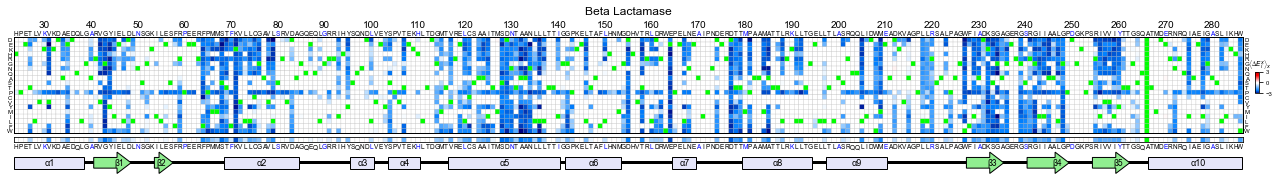

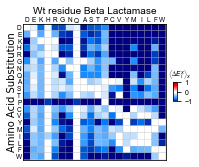

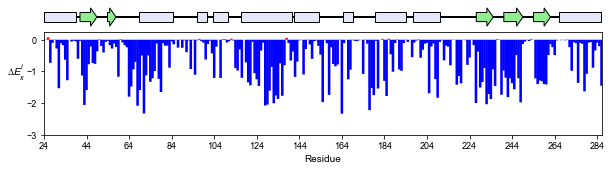

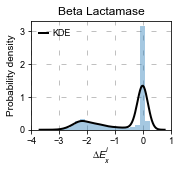

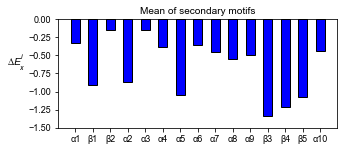

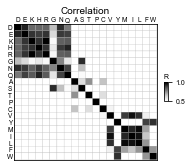

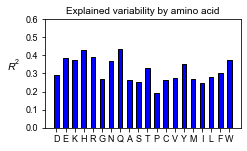

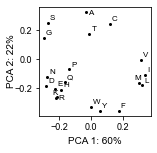

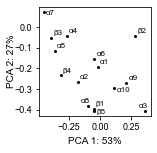

In [5]:
%matplotlib inline

# Create full heatmap
bla_obj.heatmap(
    colorbar_scale=(-3, 3),
    neworder_aminoacids=neworder_aminoacids,
    title='Beta Lactamase',
    show_cartoon=True,
    output_file=None
)

# Miniheatmap
bla_obj.miniheatmap(
    title='Wt residue Beta Lactamase',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Positional mean
bla_obj.mean(
    figsize=[10, 2.5],
    mode='mean',
    show_cartoon=True,
    yscale=[-3, 0.25],
    title='',
    output_file=None
)

# Kernel
bla_obj.kernel(
    histogram=True, title='Beta Lactamase', xscale=[-4, 1], output_file=None
)

# Graph bar of the mean of each secondary motif
bla_obj.secondary_mean(
    yscale=[-1.5, 0],
    figsize=[5, 2],
    title='Mean of secondary motifs',
    output_file=None
)

# Correlation between amino acids
bla_obj.correlation(
    colorbar_scale=[0.5, 1],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
bla_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    output_file=None
)

# PCA by amino acid substitution
bla_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

# PCA by secondary structure motif
bla_obj.pca(
    title='',
    mode='secondary',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

### 3D Plots

If you want to use the example pdbs, use the command ``pdbs_dict = mut.demo_pdbs()`` to retrieve the pdb_paths. Then when you call the method, do ``pdb_path=pdbs_dict['1erm']``.

In [6]:
%matplotlib widget

# Plot 3-D plot
bla_obj.scatter_3D(
    mode='mean',
    pdb_path='../data/1erm.pdb',
    position_correction=2,
    squared=False,
    lof=-0.75,
    gof=0.1,
    output_file=None
)

# Plot 3-D of distance to center of protein, SASA and B-factor
bla_obj.scatter_3D_pdbprop(
    plot=['Distance', 'Score', 'SASA'],
    position_correction=2,
    pdb_path='../data/1erm.pdb',
    color_by_score=False,
    output_file=None
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AttributeError: __delete__

<Figure size 432x288 with 1 Axes>

AttributeError: __delete__

<Figure size 432x288 with 1 Axes>

In [7]:
# Start pymol and color residues. Cut offs are set with gof and lof parameters.
bla_obj.pymol(
    pdb='../data/1erm.pdb', mode='mean', gof=0.2, lof=-1, position_correction=2
)

## Sumo1

### Load data

In [8]:
#https://doi.org/10.15252/msb.20177908
### 2D Plots
path = '../Data/DMS_others.xlsx'
sheet_name = 'SUMO1'
usecols = 'A,B'

# Read excel file
#df_sumo1_raw = pd.read_excel(path, sheet_name, usecols=usecols)
df_sumo1_raw = pd.read_pickle('../data/df_sumo1_raw.pkl')

# Save into pickle so it is easier to read next time you need it
#df_sumo1_raw.to_pickle('../data/df_sumo1_raw.pkl')
### 2D Plots
# Parse
df_sumo1, sequence_sumo1 = mut.parse_pivot(df_sumo1_raw, col_data='DMS')

### Create object

In [9]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_sumo1.index)
neworder_aminoacids = list('DEKHRGNQASTPCVYMILFW')

# First residue of the hras_enrichment dataset. Because 1-Met was not mutated, the dataset starts at residue 2
start_position = df_sumo1.columns[0]

# Full sequence
sequence_sumo1 = 'MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKKLKESYCQRQGVPMN'\
                    +'SLRFLFEGQRIADNHTPKELGMEEEDVIEVYQEQTGGHSTV'
# Define secondary structure
secondary_sumo1 = [['L0'] * (20), ['β1'] * (28 - 20), ['L1'] * 3,
                   ['β2'] * (39 - 31), ['L2'] * 4, ['α1'] * (55 - 43),
                   ['L3'] * (6), ['β3'] * (65 - 61), ['L4'] * (75 - 65),
                   ['α2'] * (80 - 75), ['L5'] * (85 - 80), ['β4'] * (92 - 85),
                   ['L6'] * (101 - 92)]

# Create objects
sumo_obj = mut.Screen(
    df_sumo1, sequence_sumo1, aminoacids, start_position, 1, secondary_sumo1
)

### 2D Plots

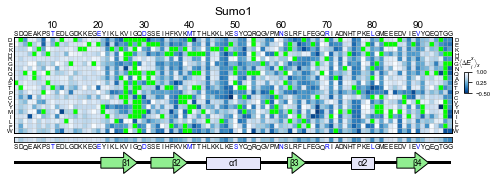

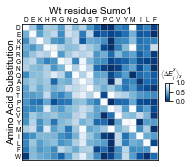

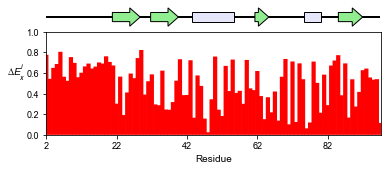

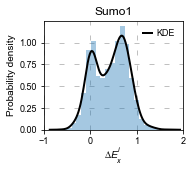

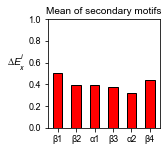

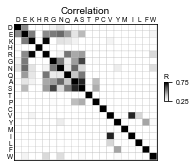

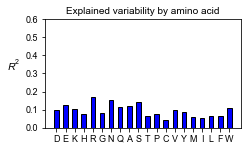

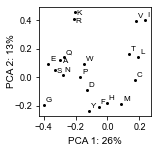

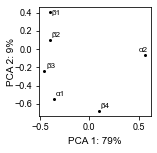

In [10]:
%matplotlib inline

# You can use your own colormap or import it from matplotlib
colormap = copy.copy((plt.cm.get_cmap('Blues_r')))

# Create full heatmap
sumo_obj.heatmap(
    colorbar_scale=(-0.5, 1),
    neworder_aminoacids=neworder_aminoacids,
    title='Sumo1',
    colormap=colormap,
    show_cartoon=True,
    output_file=None
)

# Miniheatmap
sumo_obj.miniheatmap(
    colorbar_scale=(0, 1),
    title='Wt residue Sumo1',
    neworder_aminoacids=neworder_aminoacids,
    colormap=colormap,
    output_file=None
)

# Positional mean
sumo_obj.mean(
    figsize=[6, 2.5],
    mode='mean',
    show_cartoon=True,
    yscale=[0, 1],
    title='',
    output_file=None
)

# Kernel
sumo_obj.kernel(histogram=True, title='Sumo1', xscale=[-1, 2], output_file=None)

# Graph bar of the mean of each secondary motif
sumo_obj.secondary_mean(
    yscale=[0, 1],
    figsize=[2, 2],
    title='Mean of secondary motifs',
    output_file=None
)

# Correlation between amino acids
sumo_obj.correlation(
    colorbar_scale=[0.25, 0.75],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
sumo_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    output_file=None
)

# PCA by amino acid substitution
sumo_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

# PCA by secondary structure motif
sumo_obj.pca(
    title='',
    mode='secondary',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

In [11]:
# Open pymol and color the sumo structure
sumo_obj.pymol(pdb='../data/1a5r.pdb', mode='mean', gof=1, lof=0.5)

## MAPK1

### Load data

In [12]:
path = '../Data/DMS_others.xlsx'
sheet_name = 'MAPK1'
usecols = 'A,B'
col_data = 'DMS_DOX'
#col_data = 'DMS_VRT'

# Read excel file
#df_mapk1_raw = pd.read_excel(path, sheet_name, usecols=usecols)
df_mapk1_raw = pd.read_pickle('../data/df_mapk1_raw.pkl')

# Save into pickle so it is easier to read next time you need it
#df_mapk1_raw.to_pickle('../data/df_mapk1_raw.pkl')

# Parse
df_mapk1, sequence_mapk1 = mut.parse_pivot(
    df_mapk1_raw, col_data=col_data
)

### Create object

In [13]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_mapk1.index)
neworder_aminoacids = list('DEKHRGNQASTPCVYMILFW')

# First residue of the hras_enrichment dataset. Because 1-Met was not mutated, the dataset starts at residue 2
start_position = df_mapk1.columns[0]

# Full sequence
sequence_mapk1_x = 'MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIK'\
                +'KISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQ'\
                +'HLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFL'\
                +'TEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQ'\
                +'EDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLE'\
                +'QYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS'

# Create objects
mapk1_obj = mut.Screen(
    df_mapk1, sequence_mapk1_x, aminoacids, start_position, 0
)

### 2D Plots

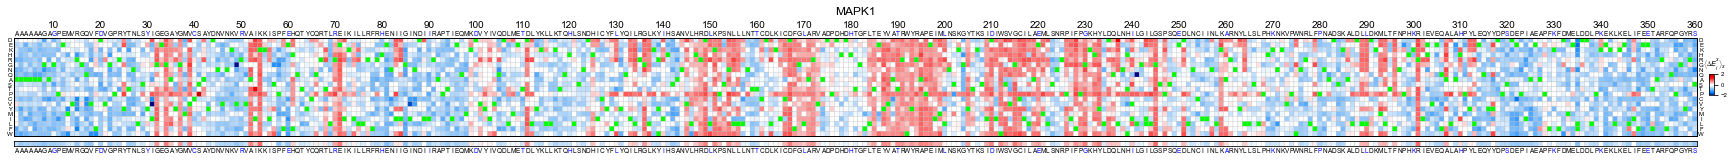

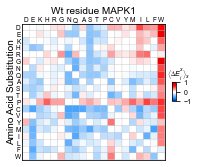

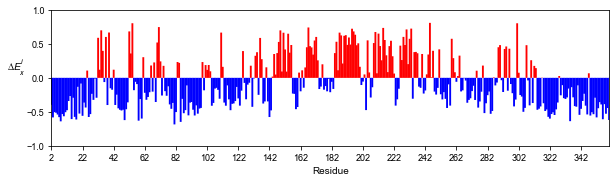

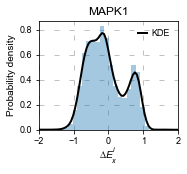

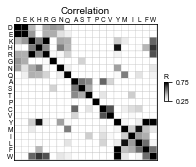

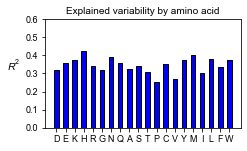

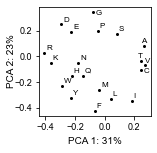

In [14]:
%matplotlib inline

# Create full heatmap
mapk1_obj.heatmap(
    colorbar_scale=(-2, 2),
    neworder_aminoacids=neworder_aminoacids,
    title='MAPK1',
    show_cartoon=False,
    output_file=None
)

# Miniheatmap
mapk1_obj.miniheatmap(
    title='Wt residue MAPK1',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Positional mean
mapk1_obj.mean(
    figsize=[10, 2.5],
    mode='mean',
    show_cartoon=False,
    yscale=[-1, 1],
    title='',
    output_file=None
)

# Kernel
mapk1_obj.kernel(
    histogram=True, title='MAPK1', xscale=[-2, 2], output_file=None
)

# Correlation between amino acids
mapk1_obj.correlation(
    colorbar_scale=[0.25, 0.75],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
mapk1_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    output_file=None
)

# PCA by amino acid substitution
mapk1_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

## UBE2I

### Load data

In [15]:
#https://doi.org/10.15252/msb.20177908

path = '../Data/DMS_others.xlsx'
sheet_name = 'UBE2I'
usecols = 'A,B'
col_data = 'DMS'

# Read excel file
#df_ube2i_raw = pd.read_excel(path, sheet_name, usecols=usecols)
df_ube2i_raw = pd.read_pickle('../data/df_ube2i_raw.pkl')

# Save into pickle so it is easier to read next time you need it
#df_ube2i_raw.to_pickle('../data/df_ube2i_raw.pkl')

# Parse
df_ube2i, sequence_ube2i = mut.parse_pivot(
    df_ube2i_raw, col_data=col_data
)

### Create object

In [16]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_ube2i.index)
neworder_aminoacids = list('DEKHRGNQASTPCVYMILFW')

# First residue of the hras_enrichment dataset. Because 1-Met was not mutated, the dataset starts at residue 2
start_position = df_ube2i.columns[0]  # Create object2i.columns[0]

# Full sequence
sequence_ube2i_x = 'MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIPGKKGTP'\
                    +'WEGGLFKLRMLFKDDYPSSPPKCKFEPPLFHPNVYPSGTVCLSILEEDKDWRPAITIKQ'\
                    +'ILLGIQELLNEPNIQDPAQAEAYTIYCQNRVEYEKRVRAQAKKFAPS'

# Define secondary structure
secondary_ube2i = [['α1'] * (20 - 1), ['L1'] * (24 - 20), ['β1'] * (30 - 24),
                   ['L2'] * 5, ['β2'] * (46 - 35), ['L3'] * (56 - 46),
                   ['β3'] * (63 - 56), ['L4'] * (73 - 63), ['β4'] * (77 - 73),
                   ['L5'] * (93 - 77), ['α2'] * (98 - 93), ['L6'] * (107 - 98),
                   ['α3'] * (122 - 107), ['L7'] * (129 - 122),
                   ['α4'] * (155 - 129), ['L8'] * (160 - 155)]

# Create objects
ube2i_obj = mut.Screen(
    df_ube2i, sequence_ube2i_x, aminoacids, start_position, 1, secondary_ube2i
)

### 2D Plots

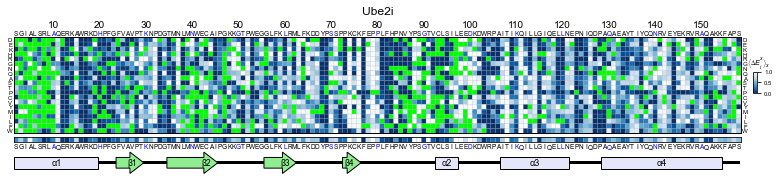

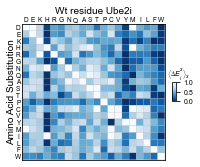

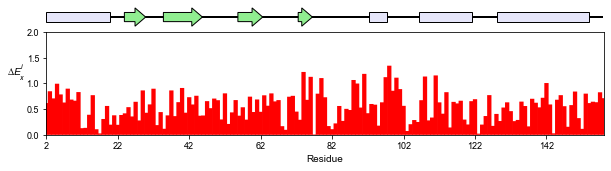

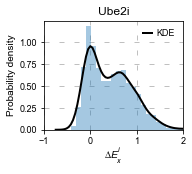

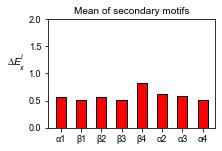

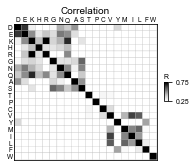

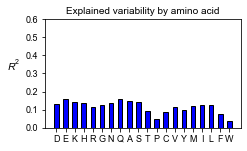

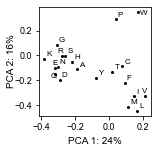

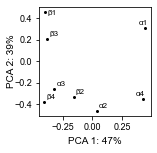

In [17]:
%matplotlib inline
colormap = copy.copy((plt.cm.get_cmap('Blues_r')))

# Create full heatmap
ube2i_obj.heatmap(
    colorbar_scale=(0, 1),
    neworder_aminoacids=neworder_aminoacids,
    title='Ube2i',
    colormap=colormap,
    show_cartoon=True,
    output_file=None
)

# Miniheatmap
ube2i_obj.miniheatmap(
    colorbar_scale=(0, 1),
    title='Wt residue Ube2i',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None,
    colormap=colormap
)

# Positional mean
ube2i_obj.mean(
    figsize=[10, 2.5],
    mode='mean',
    show_cartoon=True,
    yscale=[0, 2],
    title='',
    output_file=None
)

# Kernel
ube2i_obj.kernel(
    histogram=True, title='Ube2i', xscale=[-1, 2], output_file=None
)

# Graph bar of the mean of each secondary motif
ube2i_obj.secondary_mean(
    yscale=[0, 2],
    figsize=[3, 2],
    title='Mean of secondary motifs',
    output_file=None
)

# Correlation between amino acids
ube2i_obj.correlation(
    colorbar_scale=[0.25, 0.75],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
ube2i_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    output_file=None
)

# PCA by amino acid substitution
ube2i_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

# PCA by secondary structure motif
ube2i_obj.pca(
    title='',
    mode='secondary',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

## TAT

### Load data

In [18]:
#https://doi.org/10.1016/j.cell.2016.11.031

path = '../Data/DMS_others.xlsx'
sheet_name = 'TAT'
usecols = 'A:V'
col_data = 'DMS'
#df_tat = pd.read_excel(path, sheet_name, index_col='Aminoacid',usecols=usecols).T
df_tat = pd.read_pickle('../data/df_tat.pkl')

# Save into pickle so it is easier to read next time you need it
#df_tat.to_pickle('../data/df_tat.pkl')

### Create object

In [19]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_tat.index)
neworder_aminoacids = list('DEKHRGNQASTPCVYMILFW*')

# First residue of the hras_enrichment dataset. Because 1-Met was not mutated, the dataset starts at residue 2
start_position = df_tat.columns[0]

# Full sequence
sequence_tat = 'MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGISYGRKKRRQRRRAHQ'\
                    +'NSQTHQASLSKQPTSQPRGDPTGPKE'

# Define secondary structure
secondary_tat = [['L1'] * (8), ['α1'] * (13 - 8), ['L2'] * (28 - 14),
                 ['α2'] * (41 - 28), ['L3'] * (90 - 41)]

tat_obj = mut.Screen(
    df_tat, sequence_tat, aminoacids, start_position, 0, secondary_tat
)

### 2D Plots

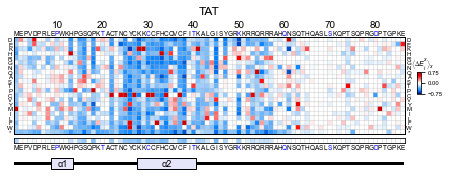

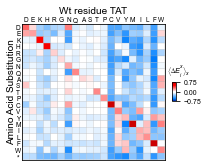

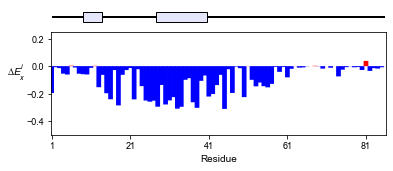

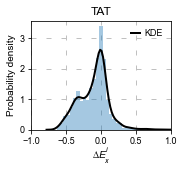

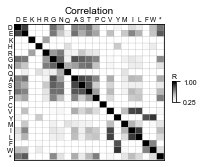

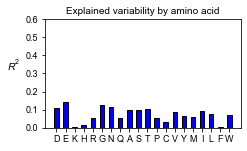

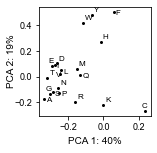

In [20]:
%matplotlib inline

# Create full heatmap
tat_obj.heatmap(
    colorbar_scale=(-0.75, 0.75),
    neworder_aminoacids=neworder_aminoacids,
    title='TAT',
    show_cartoon=True,
    output_file=None
)

# Miniheatmap
tat_obj.miniheatmap(
    title='Wt residue TAT',
    colorbar_scale=(-0.75, 0.75),
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Positional mean
tat_obj.mean(
    figsize=[6, 2.5],
    mode='mean',
    show_cartoon=True,
    yscale=[-0.5, 0.25],
    title='',
    output_file=None
)

# Kernel
tat_obj.kernel(histogram=True, title='TAT', xscale=[-1, 1], output_file=None)

# Correlation between amino acids
tat_obj.correlation(
    colorbar_scale=[0.25, 1],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
tat_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    output_file=None
)

# PCA by amino acid substitution
tat_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

## REV

### Load data

In [21]:
#https://doi.org/10.1016/j.cell.2016.11.031
#https://www.uniprot.org/uniprot/P69718### Load data### Load data

path = '../Data/DMS_others.xlsx'
sheet_name = 'REV'
usecols = 'A:V'
col_data = 'DMS'
#df_rev = pd.read_excel(path, sheet_name, index_col='Aminoacid',usecols=usecols).T
df_rev = pd.read_pickle('../data/df_rev.pkl')

# Save into pickle so it is easier to read next time you need it
#df_rev.to_pickle('../data/df_rev.pkl')

### Create object

In [22]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_rev.index)
neworder_aminoacids = list('DEKHRGNQASTPCVYMILFW*')

# First residue of the hras_enrichment dataset. Because 1-Met was not mureved, the dataset starts at residue 2
start_position = df_rev.columns[0]

# Full sequence
sequence_rev = 'MAGRSGDSDEDLLKAVRLIKFLYQSNPPPNPEGTRQARRNRRRRWRERQRQIHSISERIL'\
                + 'STYLGRSAEPVPLQLPPLERLTLDCNEDCGTSGTQGVGSPQILVESPTILESGAKE'

# Define secondary structure
secondary_rev = [['L1'] * (8), ['α1'] * (25 - 8), ['L2'] * (33 - 25),
                 ['α2'] * (68 - 33), ['L3'] * (116 - 41)]

rev_obj = mut.Screen(
    df_rev, sequence_rev, aminoacids, start_position, 0, secondary_rev
)

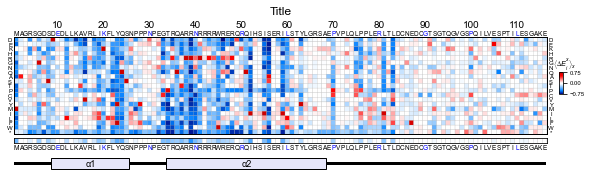

In [23]:
rev_obj.heatmap(
    colorbar_scale=(-0.75, 0.75),
    show_cartoon=True,
    neworder_aminoacids=neworder_aminoacids
)

### 2D Plots

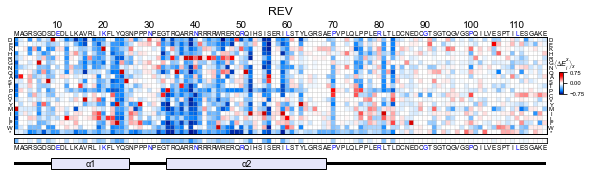

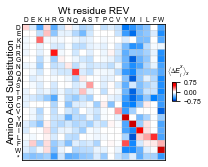

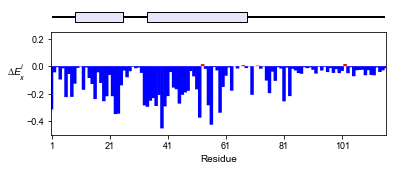

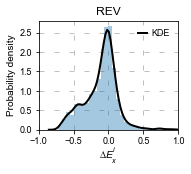

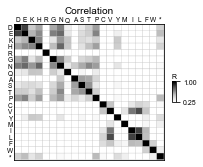

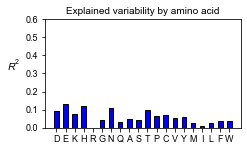

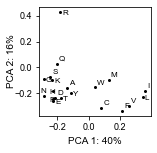

In [24]:
%matplotlib inline

# Create full heatmap
rev_obj.heatmap(
    colorbar_scale=(-0.75, 0.75),
    neworder_aminoacids=neworder_aminoacids,
    title='REV',
    show_cartoon=True,
    output_file=None
)

# Miniheatmap
rev_obj.miniheatmap(
    title='Wt residue REV',
    colorbar_scale=(-0.75, 0.75),
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Positional mean
rev_obj.mean(
    figsize=[6, 2.5],
    mode='mean',
    show_cartoon=True,
    yscale=[-0.5, 0.25],
    title='',
    output_file=None
)

# Kernel
rev_obj.kernel(histogram=True, title='REV', xscale=[-1, 1], output_file=None)

# Correlation between amino acids
rev_obj.correlation(
    colorbar_scale=[0.25, 1],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
rev_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    output_file=None
)

# PCA by amino acid substitution
rev_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

## α-synuclein

### Load data

In [25]:
#https://www.uniprot.org/uniprot/P37840#sequences
#https://doi.org/10.1038/s41589-020-0480-6
path = '../Data/DMS_others.xlsx'
sheet_name = 'a-synuclein'
usecols = 'A:EK'
#df_asynuclein = pd.read_excel(path, sheet_name, index_col='Aminoacid',usecols=usecols)
df_asynuclein = pd.read_pickle('../data/df_asynuclein.pkl')

# Save into pickle so it is easier to read next time you need it
#df_asynuclein.to_pickle('../data/df_asynuclein.pkl')

### Create object

In [26]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_asynuclein.index)
neworder_aminoacids = list('DEKHRGNQASTPCVYMILFW')

# First residue of the hras_enrichment dataset. Because 1-Met was not mureved, the dataset starts at residue 2
start_position = df_asynuclein.columns[0]

# Full sequence
sequence_asynuclein = 'MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTK'\
                + 'EQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDP'\
                + 'DNEAYEMPSEEGYQDYEPEA'

# Define secondary structure
secondary_asynuclein = [['L1'] * (1), ['α1'] * (37 - 1), ['L2'] * (44 - 37),
                        ['α2'] * (92 - 44), ['L3'] * (140 - 92)]

asynuclein_obj = mut.Screen(
    df_asynuclein, sequence_asynuclein, aminoacids, start_position, 0,
    secondary_asynuclein
)

### 2D Plots

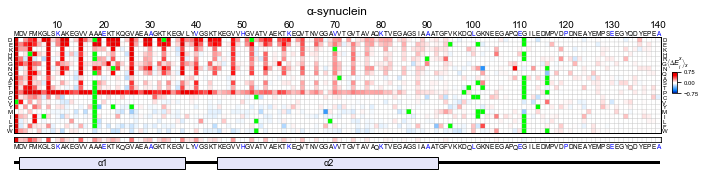

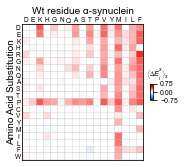

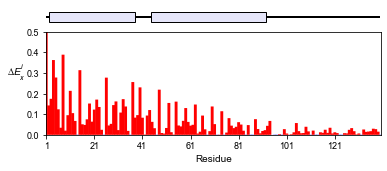

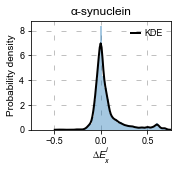

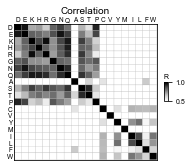

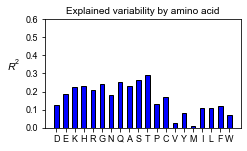

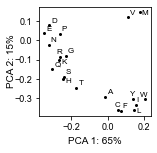

In [27]:
%matplotlib inline

# Create full heatmap
asynuclein_obj.heatmap(
    colorbar_scale=(-0.75, 0.75),
    neworder_aminoacids=neworder_aminoacids,
    title='α-synuclein',
    show_cartoon=True,
    output_file=None
)

# Miniheatmap
asynuclein_obj.miniheatmap(
    title='Wt residue α-synuclein',
    colorbar_scale=(-0.75, 0.75),
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Positional mean
asynuclein_obj.mean(
    figsize=[6, 2.5],
    mode='mean',
    show_cartoon=True,
    yscale=[0, 0.5],
    title='',
    output_file=None
)

# Kernel
asynuclein_obj.kernel(
    histogram=True, title='α-synuclein', xscale=[-0.75, 0.75], output_file=None
)

# Correlation between amino acids
asynuclein_obj.correlation(
    colorbar_scale=[0.5, 1],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
asynuclein_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    output_file=None
)

# PCA by amino acid substitution
asynuclein_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

## APH(3) II

### Load data

In [28]:
#https://doi.org/10.1093/nar/gku511
# Data needs to be applied a np.log10

path = '../Data/DMS_others.xlsx'
sheet_name = 'KKA2_S3_Kan18_L1'
usecols = 'A:JE'
#df_aph = pd.read_excel(path, sheet_name, index_col='Aminoacid',usecols=usecols)
df_aph = pd.read_pickle('../data/df_aph.pkl')

# Save into pickle so it is easier to read next time you need it
#df_aph.to_pickle('../data/df_aph.pkl')

### Create object

In [29]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_aph.index)
neworder_aminoacids = list('DEKHRGNQASTPCVYMILFW')

# First residue of the hras_enrichment dataset. Because 1-Met was not mureved, the dataset starts at residue 2
start_position = df_aph.columns[0]

# Full sequence
sequence_aph = 'MIEQDGLHAGSPAAWVERLFGYDWAQQTIGCSDAAVFRLSAQGRPVLFVKTDLSGALNELQ'\
                + 'DEAARLSWLATTGVPCAAVLDVVTEAGRDWLLLGEVPGQDLLSSHLAPAEKVSIMADAMRR'\
                + 'LHTLDPATCPFDHQAKHRIERARTRMEAGLVDQDDLDEEHQGLAPAELFARLKARMPDGED'\
                + 'LVVTHGDACLPNIMVENGRFSGFIDCGRLGVADRYQDIALATRDIAEELGGEWADRFLVLY'\
                + 'GIAAPDSQRIAFYRLLDEFF'

# Define secondary structure
secondary_aph = [['L1'] * (11), ['α1'] * (16 - 11),
                 ['L2'] * (22 - 16), ['β1'] * (26 - 22), ['L3'] * (34 - 26),
                 ['β2'] * (40 - 34), ['L4'] * (46 - 40), ['β3'] * (52 - 46),
                 ['L5'] * (58 - 52), ['α2'] * (72 - 58), ['L6'] * (79 - 72),
                 ['β4'] * (85 - 79), ['L7'] * (89 - 85), ['β5'] * (95 - 89),
                 ['L8'] * (99 - 95), ['β6'] * (101 - 99), ['L9'] * (107 - 101),
                 ['α3'] * (131 - 107), ['L10'] * (135 - 131), ['α4'] *
                 (150 - 135), ['L11'] * (158 - 150), ['α5'] * (163 - 158),
                 ['L12'] * (165 - 163), ['α6'] * (177 - 165),
                 ['L13'] * (183 - 177), ['β7'] * (187 - 183),
                 ['L14'] * (191 - 187), ['α7'] * (194 - 191), ['L15'] * (1),
                 ['β8'] * (199 - 195), ['L16'] * (201 - 199),
                 ['β9'] * (206 - 201), ['L17'] * (212 - 206),
                 ['β10'] * (216 - 212), ['α8'] * (245 - 216), ['L18'] * (4),
                 ['α9'] * (264 - 249)]

aph_obj = mut.Screen(
    np.log10(df_aph), sequence_aph, aminoacids, start_position, 0, secondary_aph
)

### 2D Plots

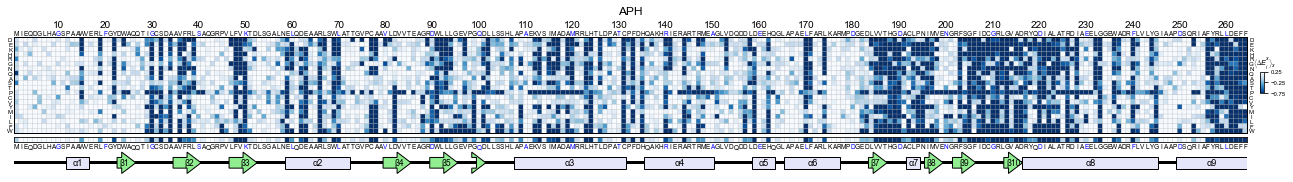

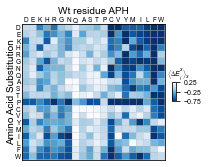

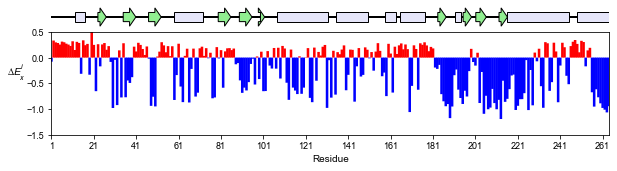

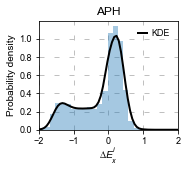

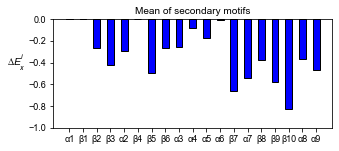

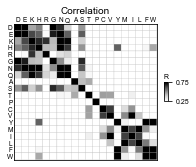

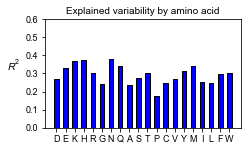

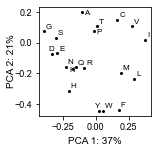

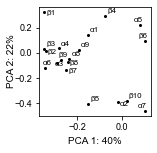

In [30]:
%matplotlib inline

colormap = copy.copy((plt.cm.get_cmap('Blues_r')))

# Create full heatmap
aph_obj.heatmap(
    colorbar_scale=(-0.75, 0.25),
    neworder_aminoacids=neworder_aminoacids,
    title='APH',
    show_cartoon=True,
    colormap=colormap,
    output_file=None
)

# Miniheatmap
aph_obj.miniheatmap(
    title='Wt residue APH',
    neworder_aminoacids=neworder_aminoacids,
    colormap=colormap,
    colorbar_scale=(-0.75, 0.25),
    output_file=None
)

# Positional mean
aph_obj.mean(
    figsize=[10, 2.5],
    mode='mean',
    show_cartoon=True,
    yscale=[-1.5, 0.5],
    title='',
    output_file=None
)

# Kernel
aph_obj.kernel(histogram=True, title='APH', xscale=[-2, 2], output_file=None)

# Graph bar of the mean of each secondary motif
aph_obj.secondary_mean(
    yscale=[-1, 0],
    figsize=[5, 2],
    title='Mean of secondary motifs',
    output_file=None
)

# Correlation between amino acids
aph_obj.correlation(
    colorbar_scale=[0.25, 0.75],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
aph_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    output_file=None
)

# PCA by amino acid substitution
aph_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

# PCA by secondary structure motif
aph_obj.pca(
    title='',
    mode='secondary',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    output_file=None
)

In [36]:
%matplotlib widget

# Plot 3-D plot
aph_obj.scatter_3D(
    mode='A',
    pdb_path='../data/1nd4.pdb',
    position_correction=0,
    squared=False,
    lof=-0.5,
    gof=0.25
)

# Plot 3-D of distance to center of protein, SASA and B-factor
aph_obj.scatter_3D_pdbprop(
    mode='R',
    plot=['Distance', 'Score', 'SASA'],
    position_correction=0,
    pdb_path='../data/1nd4.pdb',
    output_df=False,
    color_by_score=False
)

residue 1 not found
residue 2 not found
residue 3 not found
residue 4 not found
residue 5 not found
residue 6 not found
residue 7 not found
residue 8 not found
residue 9 not found


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

residue 1 not found
residue 2 not found
residue 3 not found
residue 4 not found
residue 5 not found
residue 6 not found
residue 7 not found
residue 8 not found
residue 9 not found


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AttributeError: __delete__

<Figure size 432x288 with 1 Axes>

AttributeError: __delete__

<Figure size 432x288 with 1 Axes>

In [32]:
# Start pymol and color residues. Cut offs are set with gof and lof parameters.
aph_obj.pymol(
    pdb='../data/1nd4.pdb',
    mode='mean',
    gof=0.25,
    lof=-0.5,
    position_correction=0
)

## b11L5F

### Load data

In [33]:
#https://doi.org/10.5281/zenodo.1216229

path = '../Data/DMS_others.xlsx'
sheet_name = 'b11L5F'
usecols = 'B,M'
col_data = 'relative_tryp_stability_score'

# Read excel file
#df_b11L5F_raw = pd.read_excel(path, sheet_name, usecols=usecols)
df_b11L5F_raw = pd.read_pickle('../data/df_b11L5F_raw.pkl')

# Save into pickle so it is easier to read next time you need it
#df_b11L5F_raw.to_pickle('../data/df_b11L5F_raw.pkl')

# Parse
df_b11L5F, sequence_b11L5F = mut.parse_pivot(
    df_b11L5F_raw, col_data=col_data
)

### Create object

In [34]:
# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list(df_b11L5F.index)
neworder_aminoacids = list('DEKHRGNQASTPVYMILFW')

# Sequence
sequence_b11L5F = 'CRAASLLPGTWQVTMTNEDGQTSQGQMHFQPRSPYTLDVKAQGTISDGRPI'\
                    +'SGKGKVTCKTPDTMDVDITYPSLGNMKVQGQVTLDSPTQFKFDVTTSDGSKVTGTLQRQE'

# First residue of the hras_enrichment dataset. Because 1-Met was not mureved, the dataset starts at residue 2
start_position = df_b11L5F.columns[0]

b11L5F_obj = mut.Screen(
    df_b11L5F, sequence_b11L5F, aminoacids, start_position, 0
)

### 2D Plots

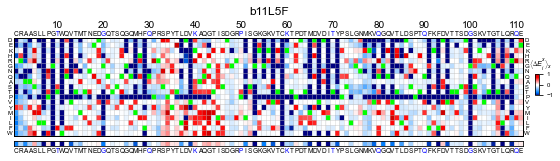

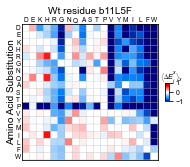

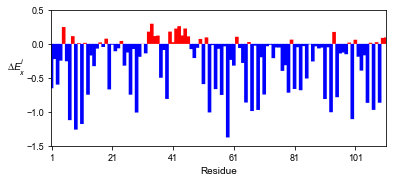

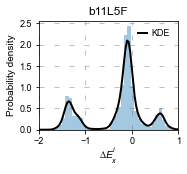

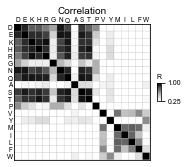

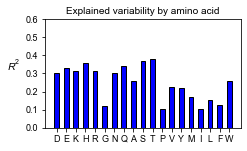

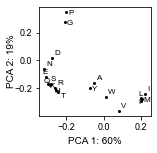

In [35]:
%matplotlib inline
colormap = copy.copy((plt.cm.get_cmap('bwr')))

# Create full heatmap
b11L5F_obj.heatmap(
    neworder_aminoacids=neworder_aminoacids, title='b11L5F', output_file=None
)

# Miniheatmap
b11L5F_obj.miniheatmap(
    title='Wt residue b11L5F',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Positional mean
b11L5F_obj.mean(
    figsize=[6, 2.5],
    mode='mean',
    yscale=[-1.5, 0.5],
    title='',
    output_file=None
)

# Kernel
b11L5F_obj.kernel(
    histogram=True, title='b11L5F', xscale=[-2, 1], output_file=None
)

# Correlation between amino acids
b11L5F_obj.correlation(
    colorbar_scale=[0.25, 1],
    title='Correlation',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

# Explained variability by amino acid
b11L5F_obj.individual_correlation(
    yscale=[0, 0.6],
    title='Explained variability by amino acid',
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)
# PCA by amino acid substitution
b11L5F_obj.pca(
    title='',
    dimensions=[0, 1],
    figsize=(2, 2),
    adjustlabels=True,
    neworder_aminoacids=neworder_aminoacids,
    output_file=None
)

## References